In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import pingouin as pg
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

task_1 = pd.read_csv('5_task_1.csv')
task_2 = pd.read_csv('5_task_2.csv')

## Task 1

In [1]:
# answer - ANOVA

## Task 2 

In [9]:
pg.homoscedasticity(data=task_1, dv='events', group='group')
# answer - p-value > 0.05, не отклоняем нулевую гипотезу

,W,pval,equal_var
levene,2.26226,0.104133,True


## Task 3

In [32]:
group_a = task_1.query("group == 'A'").events
group_b = task_1.query("group == 'B'").events
group_c = task_1.query("group == 'C'").events
pg.normality(data=task_1, dv='events', group='group', method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


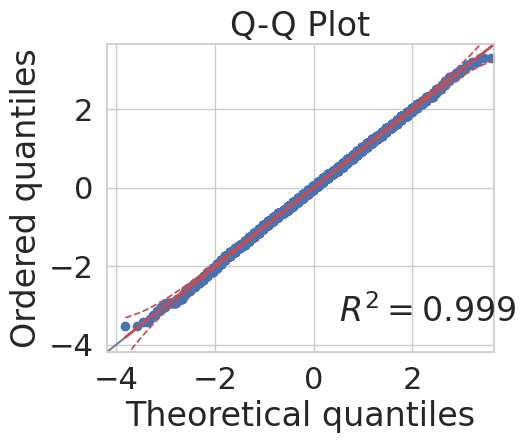

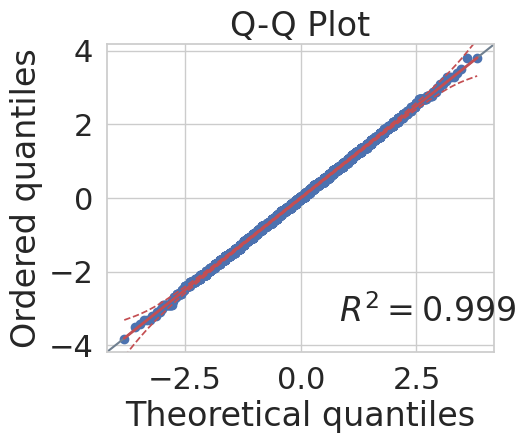

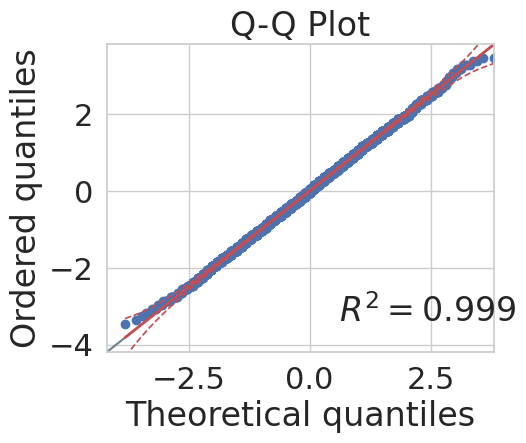

In [21]:
pg.qqplot(group_a, dist='norm')
pg.qqplot(group_b, dist='norm')
pg.qqplot(group_c, dist='norm')
plt.show()

# answer - все нормальные

## Task 4

In [39]:
pg.anova(data=task_1, dv='events', between='group', detailed=True)

# answer 
# Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ. 
# Значение статистики равно (окр. до целого) 2886, а р-уровень значимости составил 0.

/usr/local/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,SS,DF,MS,F,p-unc,np2
0,group,5.729361e+05,2,286468.062300,2886.166657,0.0,0.161377
1,Within,2.977369e+06,29997,99.255551,NaN,NaN,NaN


## Task 5

In [41]:
pg.pairwise_tukey(data=task_1, dv="events", between="group")
# answer - All of them 

/usr/local/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


## Task 6

In [45]:
# answer - B – квадратные

## Task 7

In [46]:
# answer - многофакторный дисперсионный анализ

## Task 8 

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


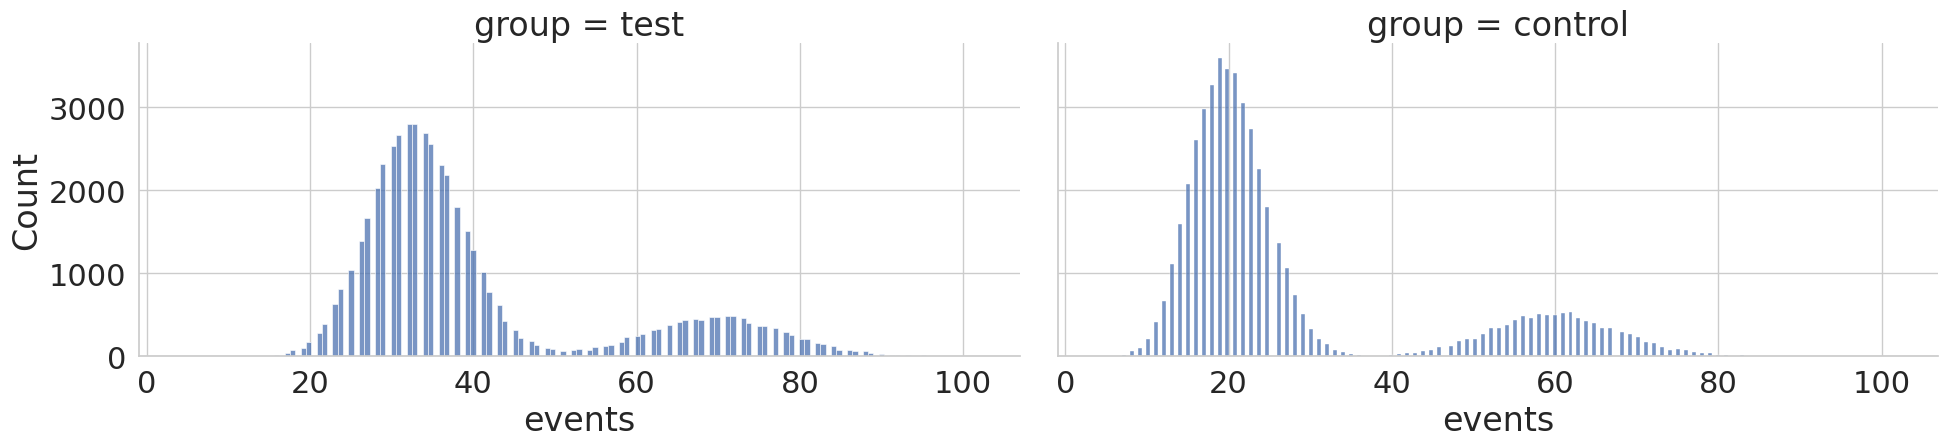

In [53]:
g = sns.FacetGrid(data=task_2, col='group', aspect = 2, height = 5)
g.map(sns.histplot, 'events')

# answer 
# a - control 
# b = treatment

## Task 9

In [60]:
(
    task_2
    .groupby(['group', 'segment'], as_index=False)
    .agg(
        mean = ('events', 'mean'),
        median = ('events', 'median'),
        std = ('events', 'std')
    )
)

## answer - 7.81

,group,segment,mean,median,std
0,control,high,59.970800,60.0,7.805347
1,control,low,20.031575,20.0,4.473576
2,test,high,69.938500,70.0,8.403974
3,test,low,33.025925,33.0,5.720845


## Task 10

In [62]:
# answer - events ~ segment + group + segment:group

## Task 11

In [64]:
pg.anova(data=task_2, dv='events', between=['group', 'segment'], detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [73]:
pg.pairwise_tukey(
    data=task_2.assign(combination = task_2.group + ' / ' + task_2.segment), 
    dv="events", 
    between='combination'
)
# answer 
# 1. Разница между control/high и test/high составила около 10
# 2. Для обоих сегментов показатели статистически значимо _уменьшились_ по сравнению с контрольной группой
# 3. Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
# 4. 

/usr/local/lib/python3.9/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,6.824282
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.703109
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.603981
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-8.527429
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.220314
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,6.307128


## Task 12

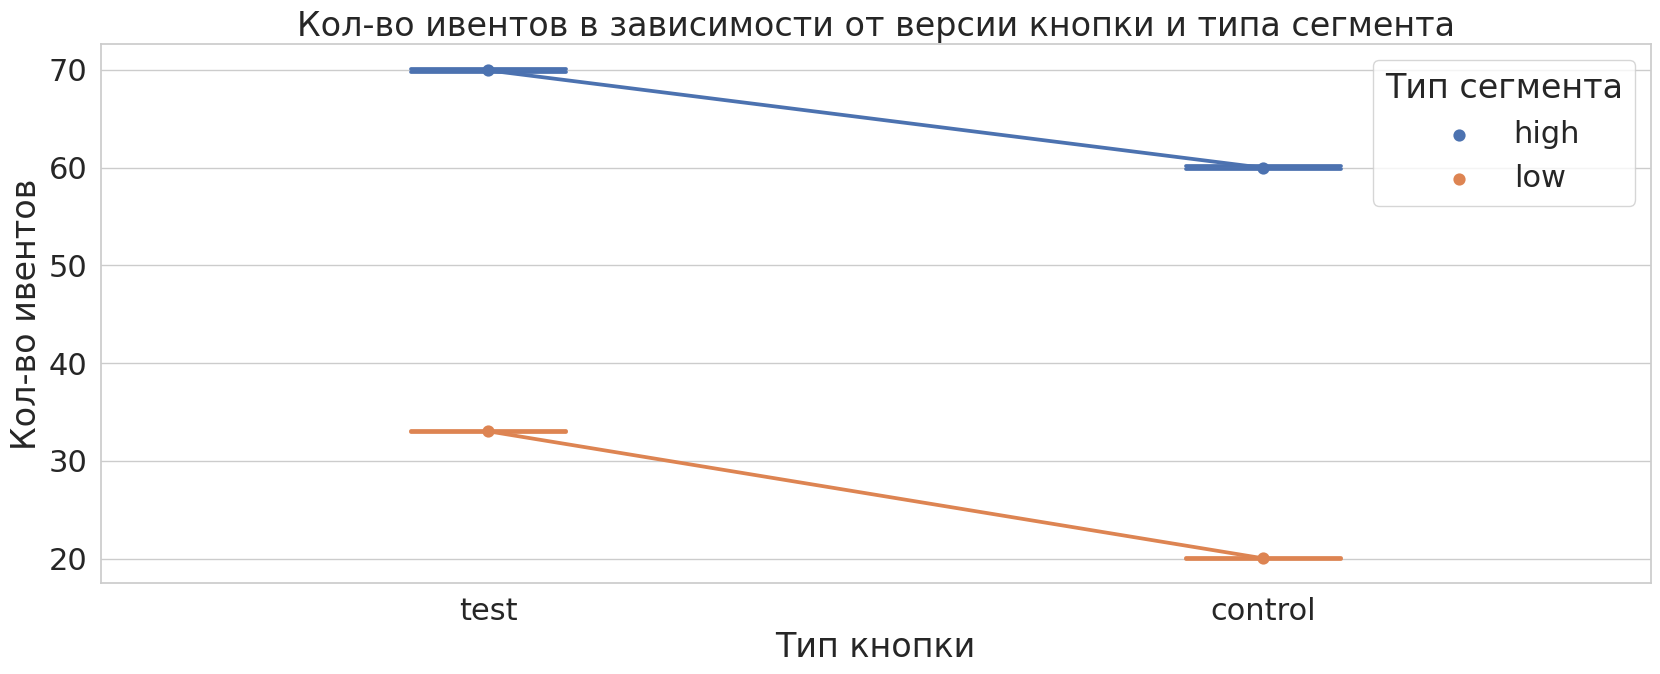

In [4]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task_2, capsize = .2)
plt.title('Кол-во ивентов в зависимости от версии кнопки и типа сегмента')
plt.xlabel('Тип кнопки')
plt.ylabel('Кол-во ивентов')
plt.legend(title = "Тип сегмента")

## answer
# Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. 
# Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.